In [1]:
#pip install --upgrade google-api-python-client

In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



In [3]:
api_key = 'Put your own API key'
#channel_id = 'UCBJycsmduvYEL83R_U4JriQ'
channel_ids =['UC4JX40jDee_tINbkjycV4Sg', #tech with tim - CA
              'UCV0qA-eDDICsRR9rPcnG7tw', #joma tech
              'UCfzlCWGWYyIQ0aLC5w48gBQ', #sentdex
              'UCCezIgC97PvUuR4_gbFUs5g', #corey schafer
              'UCNU_lfiiWBdtULKOw6X0Dig' ] #Krish Naik
youtube = build('youtube','v3',developerKey=api_key)


In [4]:
# function to get channel stats from youtube APi Data 
def get_stats(youtube,channel_ids):
    all_data=[]
    request = youtube.channels().list(
        part='snippet , contentDetails , statistics',
        id= ','.join(channel_ids)) # convert list into string 
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_Name = response['items'][i]['snippet']['title'],
                Subscribers = response['items'][i]['statistics']['subscriberCount'],
               Views = response['items'][i]['statistics']['viewCount'],
                Total_videos = response['items'][i]['statistics']['videoCount'],
                playlist_id =response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
        #return response    # to check json format output 
    return all_data


In [5]:
channel_stats = get_stats(youtube,channel_ids)

In [6]:
channel_data = pd.DataFrame(channel_stats)
channel_data

,Channel_Name,Subscribers,Views,Total_videos,playlist_id
0,Tech With Tim,1400000,131199337,945,UU4JX40jDee_tINbkjycV4Sg
1,Krish Naik,853000,86465031,1760,UUNU_lfiiWBdtULKOw6X0Dig
2,sentdex,1280000,112797344,1250,UUfzlCWGWYyIQ0aLC5w48gBQ
3,Corey Schafer,1240000,91395822,232,UUCezIgC97PvUuR4_gbFUs5g
4,Joma Tech,2270000,178573930,98,UUV0qA-eDDICsRR9rPcnG7tw


In [7]:
channel_data.dtypes

Channel_Name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [8]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']= pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_Name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

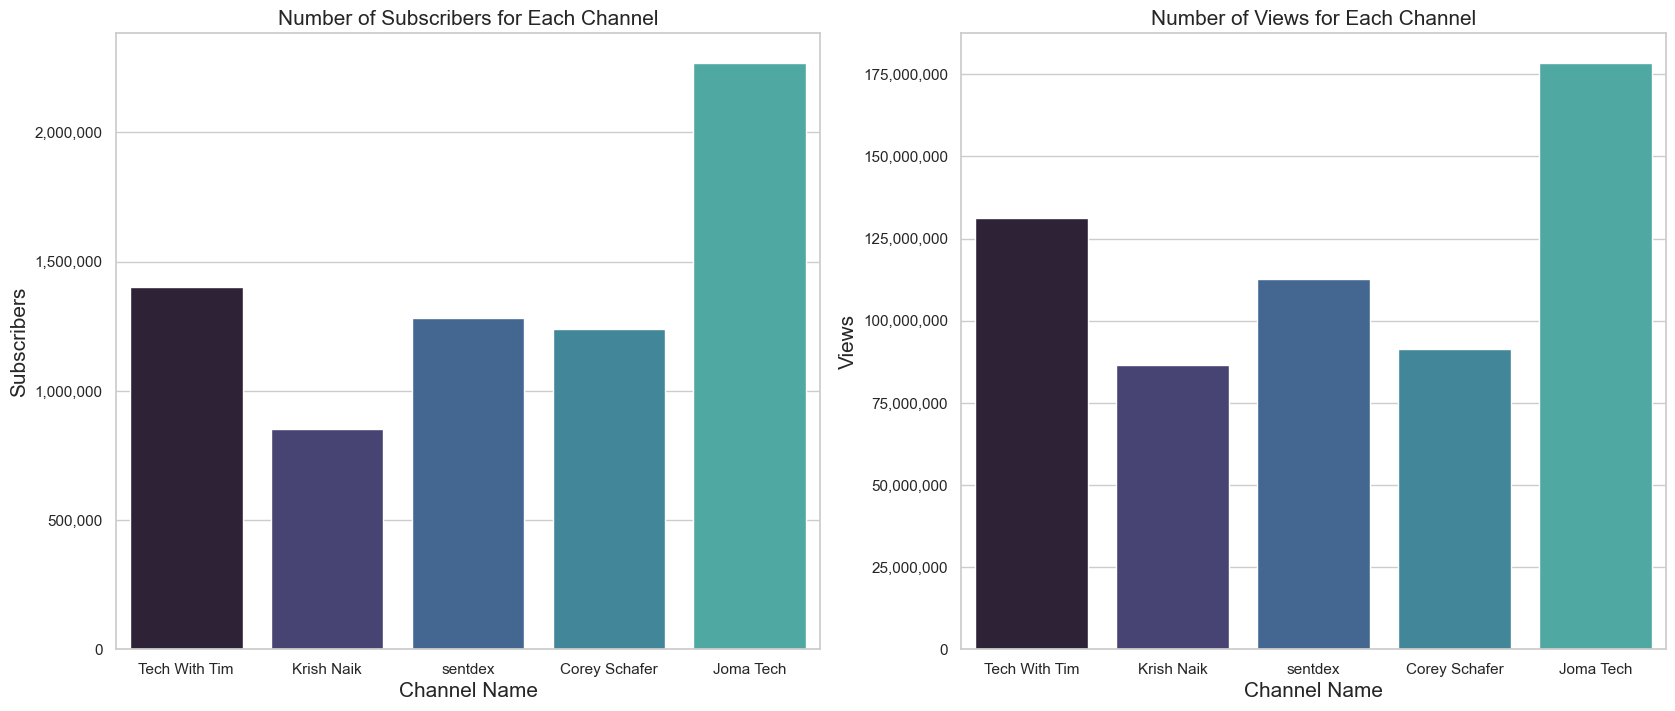

In [9]:

sns.set(style="whitegrid")
sns.set_palette("mako")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

ax1 = sns.barplot(x='Channel_Name', y='Subscribers', data=channel_data, ax=axes[0])
ax1.set_title('Number of Subscribers for Each Channel', fontsize=15)
ax1.set_xlabel('Channel Name', fontsize=15)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax1.set_ylabel('Subscribers', fontsize=15)

ax2 = sns.barplot(x='Channel_Name', y='Views', data=channel_data, ax=axes[1])
ax2.set_title('Number of Views for Each Channel', fontsize=15)
ax2.set_xlabel('Channel Name', fontsize=15)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax2.set_ylabel('Views', fontsize=15)

plt.show()


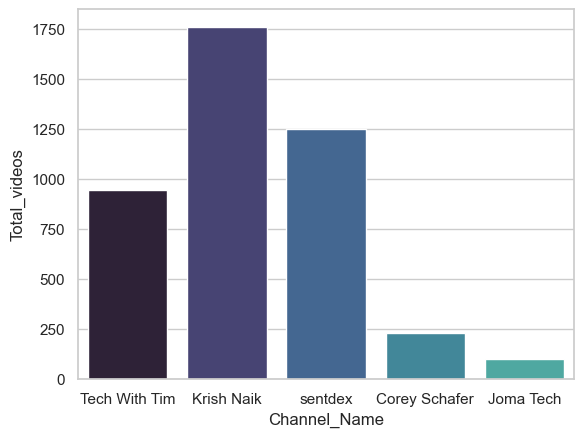

In [10]:
ax1 = sns.barplot(x='Channel_Name', y='Total_videos', data=channel_data)


Video Details

In [11]:
playlist_id = channel_data.loc[channel_data['Channel_Name']=='Krish Naik','playlist_id'].iloc[0]
playlist_id

'UUNU_lfiiWBdtULKOw6X0Dig'

In [12]:
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
    part='contentDetails',
    playlistId =playlist_id,
    maxResults=50)  
    response = request.execute()
    

    video_ids =[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token =response.get('nextPageToken')
    more_pages =True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                         playlistId =playlist_id,
                         maxResults=50,
                        pageToken = next_page_token)  
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
                
                next_page_token = response.get('nextPageToken')
    
    return video_ids

In [13]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['W0rNUAfqGFc',
 'o11J4oO-P28',
 'zT-cc1IblsQ',
 '9Oh-hDT_VaY',
 'zxo3T4aQj6Q',
 'cMJWC-csdK4',
 'nCglvjJkU8A',
 '0R1mA_MVItI',
 'HWbbQChO_u4',
 'it0l6lx3qI0',
 '0y2nPFChke8',
 'erUfLIi9OFM',
 'IPOZS2JisVM',
 'k7k7SzeUiak',
 '-QonWd-aqRM',
 'ENLEjGozrio',
 'k7ateFg6KN8',
 '4Thqmsaayjo',
 'rwftyoRIqaQ',
 'fTaXHlSh-0Y',
 'jz3f_sYX3ks',
 'AAJiWnY9NLs',
 '0nqfdT5SKeg',
 'IrA3Wmm1M0U',
 'qMIM7dECAkc',
 'd4G4vC4Px_o',
 '5VUHUELKBzs',
 '4O1rs7mrNDo',
 'Bpcjmfqwukw',
 '7JayocM9yck',
 'v8yigSMQJak',
 'kFR9c3mUGgE',
 'xHwiBF0wVF8',
 'YT3GoxjXhIc',
 '86BKEv0X2xU',
 'uii05OE2kjs',
 'lDWUJiivMX8',
 '61CFTi_Cv_4',
 'vIrUK7XYgdo',
 'u6SSI1i_WDg',
 'S0VE0OEg_Mo',
 'rLfaX6JtoDg',
 'ekSduyKsiWw',
 'VNfalYYduD4',
 'lv5IEOItgWM',
 'yxwS8Z7v880',
 'c63bTKjwfaQ',
 'ogjO1evIX_c',
 'A0kDpPMXyY0',
 'Apa373mJ1mQ',
 'GxDsZ8sakOQ',
 'efpARWCsuFo',
 'lJCsVBccQgk',
 'WFLbNu-mCBc',
 'W6H20V7JQ1E',
 's0RxGFdpSjE',
 'B2scdmTZ834',
 'V7ZiWIcdu74',
 'WeR301q9wRc',
 'cgc3dSEAel0',
 'cnY6jQlJcQc',
 'i_FtfdOKa2M',
 'pUUcLQ

In [14]:
def get_video_details(youtube, video_ids):
    
    all_video_stats =[]
    
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
            part='snippet , statistics',
            id = ','.join(video_ids[i:i+50])) #youtube only allows 50 items at a time 
    
        response= request.execute()
    
        for video in response['items']:
    
            video_stats = dict(Title = video['snippet']['title'],
                                Published_date = video['snippet']['publishedAt'],
                                Views =video['statistics']['viewCount'],
                                Likes = video['statistics']['likeCount']
                               # Dislikes = video['statistics']['dislikeCount'],
                                #Comments = video['statistics']['commentCount']
                                ) 
    
            all_video_stats.append(video_stats)

    return all_video_stats


In [15]:
video_details = get_video_details(youtube,video_ids)
video_details

[{'Title': "Google Gemini Pro LLM Model Free API Demo With Code- Is It Better Than OpenAI GPT's?",
  'Published_date': '2023-12-20T18:17:13Z',
  'Views': '19211',
  'Likes': '566'},
 {'Title': 'Different Text Summarization Techniques Using Langchain #generativeai',
  'Published_date': '2023-12-19T15:01:25Z',
  'Views': '7495',
  'Likes': '234'},
 {'Title': 'Complete MLOPS Platform To Build LLMs Application In PostgresML-Bring ML code to your Database',
  'Published_date': '2023-12-18T14:51:44Z',
  'Views': '15851',
  'Likes': '307'},
 {'Title': 'Power Of Open Source Contribution-50+ End To End Data Science Projects Contributed By You All',
  'Published_date': '2023-12-17T12:32:34Z',
  'Views': '21436',
  'Likes': '899'},
 {'Title': 'Build a PDF Document Question Answering LLM System With Langchain,Cassandra,Astra DB,Vector Database',
  'Published_date': '2023-12-14T08:09:20Z',
  'Views': '26598',
  'Likes': '395'},
 {'Title': 'End To End LLM Project Using LLAMA 2- Open Source LLM Model

In [16]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Published_date,Views,Likes
0,Google Gemini Pro LLM Model Free API Demo With...,2023-12-20T18:17:13Z,19211,566
1,Different Text Summarization Techniques Using ...,2023-12-19T15:01:25Z,7495,234
2,Complete MLOPS Platform To Build LLMs Applicat...,2023-12-18T14:51:44Z,15851,307
3,Power Of Open Source Contribution-50+ End To E...,2023-12-17T12:32:34Z,21436,899
4,Build a PDF Document Question Answering LLM Sy...,2023-12-14T08:09:20Z,26598,395
...,...,...,...,...
1691,Important libraries used in python Data Scienc...,2017-11-26T07:48:27Z,20946,183
1692,Anaconda installation with Packages- Machine L...,2017-11-26T06:16:34Z,76905,351
1693,What is Supervised Machine Learning- Machine L...,2017-11-26T04:50:08Z,35799,404
1694,What is Machine Learning in Data Science- Mach...,2017-11-25T12:27:20Z,144718,886


In [17]:
video_data['Views']= pd.to_numeric(video_data['Views'])
video_data['Likes']= pd.to_numeric(video_data['Likes'])
video_data['Published_date']= pd.to_datetime(video_data['Published_date']).dt.date
video_data

,Title,Published_date,Views,Likes
0,Google Gemini Pro LLM Model Free API Demo With...,2023-12-20,19211,566
1,Different Text Summarization Techniques Using ...,2023-12-19,7495,234
2,Complete MLOPS Platform To Build LLMs Applicat...,2023-12-18,15851,307
3,Power Of Open Source Contribution-50+ End To E...,2023-12-17,21436,899
4,Build a PDF Document Question Answering LLM Sy...,2023-12-14,26598,395
...,...,...,...,...
1691,Important libraries used in python Data Scienc...,2017-11-26,20946,183
1692,Anaconda installation with Packages- Machine L...,2017-11-26,76905,351
1693,What is Supervised Machine Learning- Machine L...,2017-11-26,35799,404
1694,What is Machine Learning in Data Science- Mach...,2017-11-25,144718,886


In [18]:
# top 10 videos of Krish 

top10 = video_data.sort_values(by='Views', ascending=False).head(10)
top10


,Title,Published_date,Views,Likes
1443,AI VS ML VS DL VS Data Science,2019-11-26,2719789,65447
1003,Complete Road Map To Be Expert In Python- Foll...,2020-09-18,1668749,18519
1561,How To Learn Data Science Smartly?,2019-08-22,1622370,51854
439,OTT Platform For Education OneNeuron- Educatio...,2021-12-11,736326,984
893,Negotiating Salaries With HR for Any Job Is An...,2020-12-30,710880,16098
993,Complete Road Map To Prepare NLP-Follow This V...,2020-09-25,632262,4724
1108,Live- Implementation of End To End Kaggle Mach...,2020-06-30,591317,13870
1552,How To Learn Data Science by Self Study and Fo...,2019-08-27,539692,28007
296,Complete Machine Learning In 6 Hours| Krish Naik,2022-05-28,528587,10901
275,Complete Statistics For Data Science In 6 hour...,2022-06-19,523654,11552


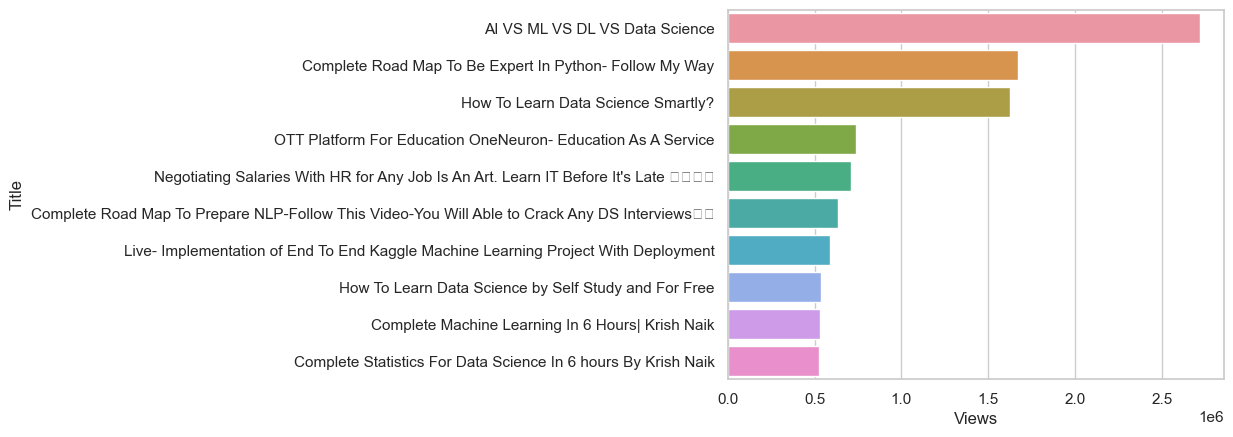

In [19]:
ax1 = sns.barplot(x='Views' , y='Title' , data = top10)

In [20]:
# how many videoes posting everymonth 

video_data['Month']= pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Month
0,Google Gemini Pro LLM Model Free API Demo With...,2023-12-20,19211,566,Dec
1,Different Text Summarization Techniques Using ...,2023-12-19,7495,234,Dec
2,Complete MLOPS Platform To Build LLMs Applicat...,2023-12-18,15851,307,Dec
3,Power Of Open Source Contribution-50+ End To E...,2023-12-17,21436,899,Dec
4,Build a PDF Document Question Answering LLM Sy...,2023-12-14,26598,395,Dec
...,...,...,...,...,...
1691,Important libraries used in python Data Scienc...,2017-11-26,20946,183,Nov
1692,Anaconda installation with Packages- Machine L...,2017-11-26,76905,351,Nov
1693,What is Supervised Machine Learning- Machine L...,2017-11-26,35799,404,Nov
1694,What is Machine Learning in Data Science- Mach...,2017-11-25,144718,886,Nov


In [21]:
total_videos_month = video_data.groupby('Month', as_index=False).size()
total_videos_month

,Month,size
0,Apr,137
1,Aug,161
2,Dec,105
3,Feb,139
4,Jan,182
5,Jul,142
6,Jun,168
7,Mar,139
8,May,138
9,Nov,112


In [22]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_videos_month.index = pd.CategoricalIndex(total_videos_month['Month'], categories=sort_order, ordered=True)

In [23]:
total_videos_month.sort_index()

,Month,size
Month,,
Jan,Jan,182
Feb,Feb,139
Mar,Mar,139
Apr,Apr,137
May,May,138
Jun,Jun,168
Jul,Jul,142
Aug,Aug,161
Sep,Sep,147


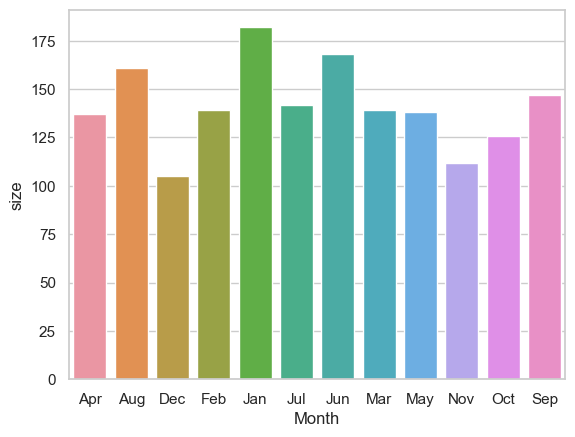

In [24]:
ax2 = sns.barplot(x='Month', y='size', data=total_videos_month)